<a href="https://colab.research.google.com/github/alecmeade/cs242_final_alec_daniel/blob/master/Image_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Imports 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob
from skimage import io
from skimage.transform import rescale
import matplotlib.pyplot as plt


Video samples: https://media.xiph.org/


In [0]:
#@title Data Ingest functions

#this annoyingly doesnt work right now
frame = wget.download("http://192.168.254.64:8000/trees/frame_00001.png")

In [0]:
#@title Error Functions

#Calculate the psnr error between the golden frames and the predicted frames.
def EvaluatePSNR(golden_frames, predicted_frames):
  '''
  golden_frames: A tf.tensor representing the set of original sequential frames.
  predicted_frames: A tf.tensor reprsenting the set of predicted frames. 

  return: The psnr between the two transformed in some way to fit with the 
  understanding of error.
  '''
  psnr = tf.image.psnr(golden_frames, predicted_frames, max_val=1.0)
  #TODO(scale the psnr)
  return psnr

#Calculate the ssim error between the golden frames and the predicted frames.
def EvaluateSSIM(golden_frames, predicted_frames):
  '''
  golden_frames: A tf.tensor representing the set of original sequential frames.
  predicted_frames: A tf.tensor reprsenting the set of predicted frames. 

  return: The sse between the two transformed in some way to fit with the 
  understanding of error.
  '''
  raise NotImplementedError

#Calculate the vgg error between the golden frames and the predicted frames.
def EvaluateVGG(golden_frames, predicted_frames):
  '''
  golden_frames: A tf.tensor representing the set of original sequential frames.
  predicted_frames: A tf.tensor reprsenting the set of predicted frames. 

  return: The vgg between the two transformed in some way to fit with the 
  understanding of error.
  '''
  raise NotImplementedError

In [0]:
#@title Network Building Functions

#Create a unet with no skip level connections. The number of filters is constent
#across the entire network.
def BuildModel(input_shape, depth):
  input_layer = keras.layers.Input(shape=input_shape)

  # Make Encoder
  encoder_last_layer = input_layer
  filter_num = input_shape[2]
  for i in range(depth):
    encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)
    encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)
    encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)
    encoder_last_layer = keras.layers.MaxPool2D()(encoder_last_layer)
  # Add the last three convolutional layers
  encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)
  encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)
  encoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(encoder_last_layer)

  decoder_input = keras.layers.Conv2DTranspose(filter_num, 3, padding='same', strides=2, activation=tf.nn.relu)(encoder_last_layer)
  decoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(decoder_input)
  decoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(decoder_last_layer)
  for i in range(depth - 1):
    decoder_last_layer = keras.layers.Conv2DTranspose(filter_num, 3, padding='same', strides=2, activation=tf.nn.relu)(decoder_last_layer)
    decoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(decoder_last_layer)
    decoder_last_layer = keras.layers.Conv2D(filter_num, 3, padding='same', activation=tf.nn.relu)(decoder_last_layer)
  return (input_layer, encoder_last_layer, decoder_input, decoder_last_layer)

In [0]:
#@title Plot Input vs Output Frames

def PlotFrames(golden_frames, predicted_frames):
  frame_shape = golden_frames.shape
  num_images = int(frame_shape[3] / 3)
  print(frame_shape)

  # Check to make sure tensors have the proper shapes

  # Reshape both tensors to be image based.
  reshaped_golden_frames = golden_frames.reshape(num_images, 
                                                 frame_shape[1], 
                                                 frame_shape[2], 3)
  reshaped_predicted_frames =  predicted_frames.reshape(num_images, 
                                                        frame_shape[1], 
                                                        frame_shape[2], 3)
  fig, axes = plt.subplots(num_images, 2, figsize=(40, 40))
  for i in range(num_images):
    axes[i, 0].imshow(reshaped_golden_frames[i])
    axes[i, 1].imshow(reshaped_predicted_frames[i])
  plt.tight_layout()
  plt.show()


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
files = glob.glob("gdrive/My Drive/tf_video/frames/*")
files.sort()
print(files)

['gdrive/My Drive/tf_video/frames/frame_00001.png', 'gdrive/My Drive/tf_video/frames/frame_00002.png', 'gdrive/My Drive/tf_video/frames/frame_00003.png', 'gdrive/My Drive/tf_video/frames/frame_00004.png', 'gdrive/My Drive/tf_video/frames/frame_00005.png', 'gdrive/My Drive/tf_video/frames/frame_00006.png', 'gdrive/My Drive/tf_video/frames/frame_00007.png', 'gdrive/My Drive/tf_video/frames/frame_00008.png', 'gdrive/My Drive/tf_video/frames/frame_00009.png', 'gdrive/My Drive/tf_video/frames/frame_00010.png', 'gdrive/My Drive/tf_video/frames/frame_00011.png', 'gdrive/My Drive/tf_video/frames/frame_00012.png', 'gdrive/My Drive/tf_video/frames/frame_00013.png', 'gdrive/My Drive/tf_video/frames/frame_00014.png', 'gdrive/My Drive/tf_video/frames/frame_00015.png', 'gdrive/My Drive/tf_video/frames/frame_00016.png', 'gdrive/My Drive/tf_video/frames/frame_00017.png', 'gdrive/My Drive/tf_video/frames/frame_00018.png', 'gdrive/My Drive/tf_video/frames/frame_00019.png', 'gdrive/My Drive/tf_video/fram

In [0]:
image_array = []
for i in range(8):
    image_array.append(rescale(io.imread(files[i]).astype(float) / 255.0, (.25, .25, 1)))
image_array = np.concatenate(np.array(image_array), 2)

In [0]:
image_array.shape

(512, 1024, 24)

In [0]:
data_image_array = image_array.reshape(1, 512, 1024, 24)

In [0]:
(input_layer, encoder_last_layer, decoder_input, decoder_last_layer) = BuildModel(image_array.shape, 6)
full_model = tf.keras.models.Model(input_layer, decoder_last_layer)
opt = keras.optimizers.Adam(lr=.00001)
full_model.compile(optimizer=opt, loss=tf.keras.losses.MeanSquaredError())
full_model.fit(data_image_array, data_image_array, epochs=10, batch_size=1)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0724


In [0]:
output = full_model.predict(data_image_array)

(1, 512, 1024, 24)


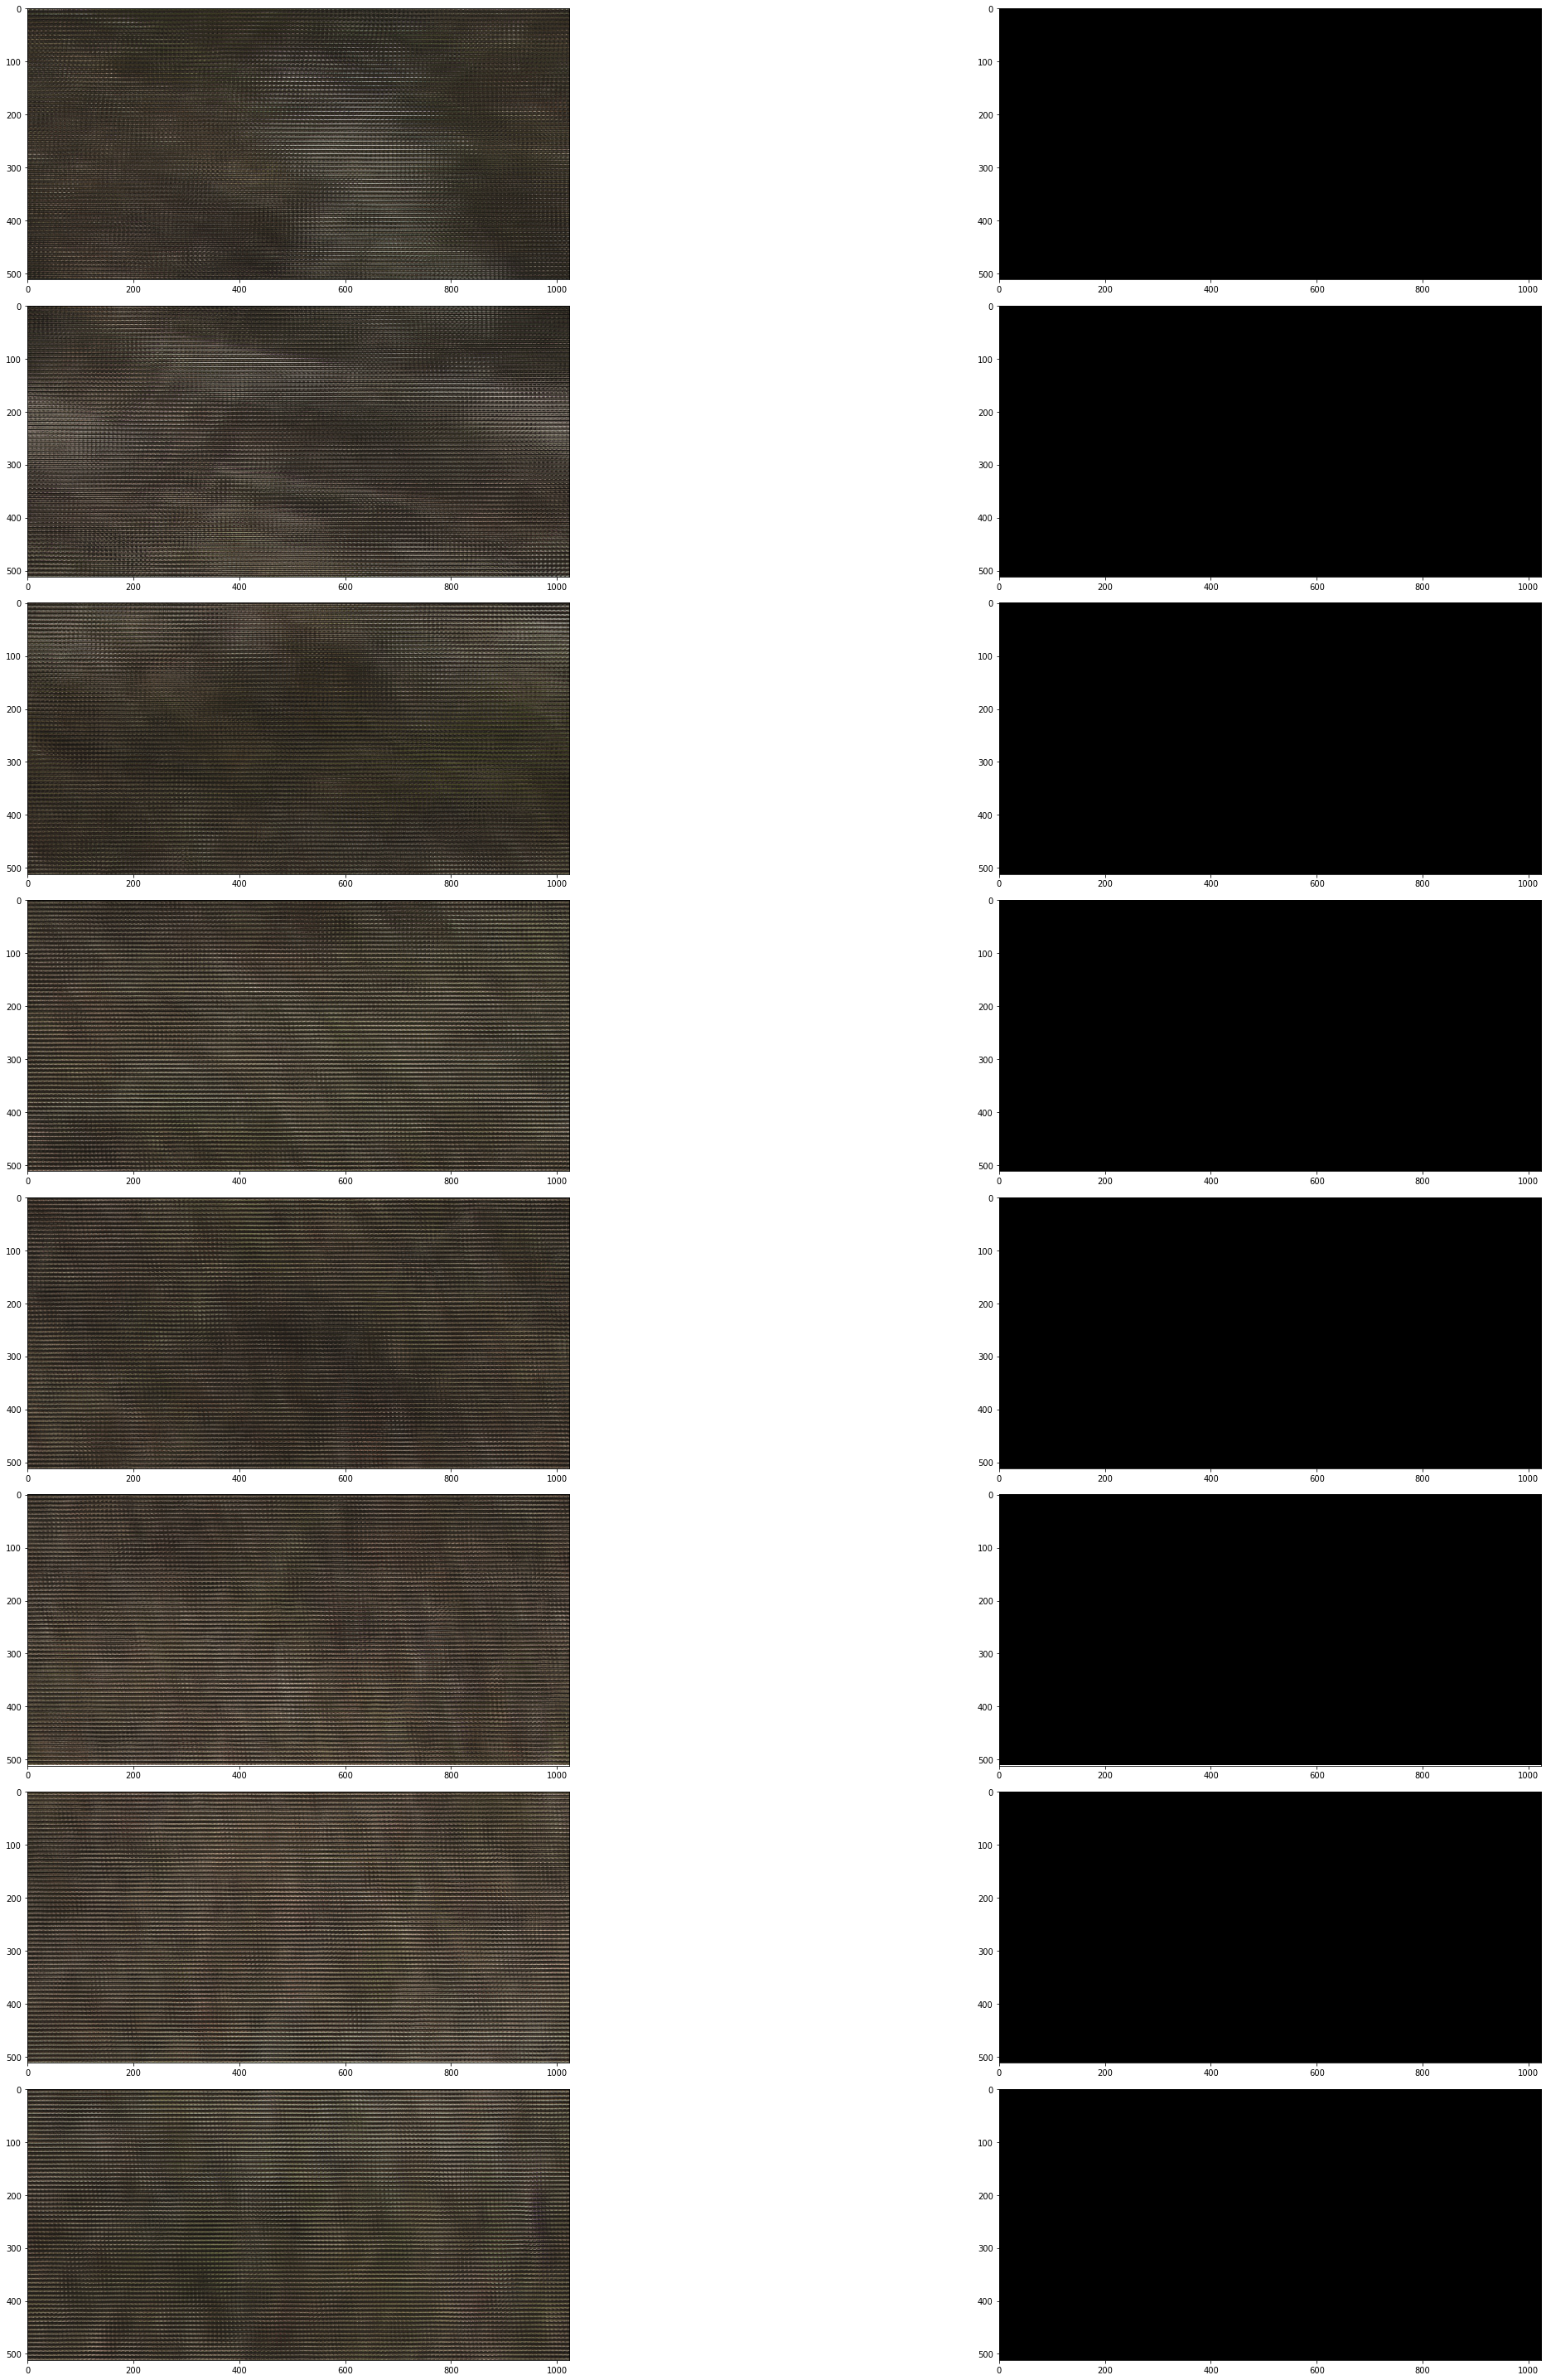

In [0]:
PlotFrames(data_image_array, output)